# Tugas 2 Data Understanding
## **Penjelasan Outlier Deteksi**
### **Mendeteksi Outlier Menggunakan K-Nearest Neighbors (KNN) dalam Analisis Data**  
#### 1. Pengenalan Outlier dalam Analisis Data
Outlier adalah data yang memiliki nilai yang sangat berbeda dibandingkan dengan sebagian besar data lainnya dalam suatu dataset. Outlier dapat muncul karena berbagai faktor, seperti kesalahan pengukuran, kesalahan saat memasukkan data, atau fenomena yang jarang terjadi. Dalam tahap pemahaman data, penting untuk mengidentifikasi outlier karena keberadaannya dapat berdampak pada hasil analisis, pemodelan, serta pengambilan keputusan. Jika tidak terdeteksi, outlier dapat menyebabkan model analisis statistik atau machine learning menjadi kurang akurat, bias, atau bahkan gagal menghasilkan prediksi yang valid.

#### 2. Pendekatan K-Nearest Neighbors (KNN) dalam Mendeteksi Outlier
Salah satu metode yang dapat digunakan untuk mendeteksi outlier adalah K-Nearest Neighbors (KNN). Algoritma ini bekerja berdasarkan prinsip bahwa sebagian besar data normal akan berada dalam kelompok yang padat, sementara outlier cenderung berada jauh dari kelompok utama. Berikut adalah cara kerja dasar KNN dalam mendeteksi outlier:


*   Mekanisme Kerja KNN:



KNN menghitung jarak antara satu titik data dengan titik-titik data di sekitarnya. Jika suatu titik memiliki jarak yang cukup jauh dari sebagian besar tetangganya, maka titik tersebut bisa dianggap sebagai outlier. Secara matematis, KNN mengukur jarak menggunakan berbagai metode seperti Euclidean, Manhattan, atau Minkowski untuk menentukan k-tetangga terdekat. Jika rata-rata jarak ke k-tetangga lebih besar dari nilai ambang tertentu, maka titik tersebut dikategorikan sebagai outlier.

#### Kapan Menggunakan KNN untuk Deteksi Outlier?
KNN merupakan metode yang berguna dalam mendeteksi outlier dalam beberapa kondisi berikut

Data dengan Dimensi Tinggi: KNN mampu bekerja pada dataset dengan banyak fitur, meskipun kinerjanya dapat menurun jika jumlah dimensi terlalu besar akibat efek "curse of dimensionality".

Data Tanpa Distribusi Tertentu: Algoritma ini tidak memerlukan asumsi tentang distribusi data, sehingga cocok digunakan pada dataset yang tidak mengikuti distribusi normal atau tertentu.

Dataset Berukuran Sedang: KNN lebih optimal digunakan pada dataset yang tidak terlalu besar karena kompleksitas komputasi meningkat seiring bertambahnya jumlah data. Jika dataset terlalu besar, metode lain seperti Local Outlier Factor (LOF) atau Isolation Forest bisa menjadi pilihan yang lebih efisien.


#### Kesimpulan
K-Nearest Neighbors (KNN) adalah metode yang cukup efektif dalam mengidentifikasi outlier, terutama pada tahap eksplorasi data. Metode ini memanfaatkan perhitungan jarak untuk menemukan titik data yang memiliki perbedaan signifikan dibandingkan sebagian besar data lainnya. Meskipun memiliki kelebihan seperti fleksibilitas dan kemudahan implementasi, KNN juga memiliki beberapa kekurangan, terutama dalam hal efisiensi komputasi serta pemilihan parameter yang tepat. Oleh karena itu, penting untuk memahami karakteristik dataset sebelum memilih KNN sebagai metode deteksi outlier.

Dalam praktiknya, KNN sering dikombinasikan dengan teknik lain, seperti visualisasi data (misalnya scatter plot atau box plot), untuk memverifikasi hasil deteksi outlier dan memastikan kualitas data yang lebih baik sebelum melanjutkan ke tahap pemodelan.

In [15]:
%pip install pymysql
%pip install psycopg2


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Melakukan Analisis Data dan Koneksi Database

In [1]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.neighbors import NearestNeighbors

#### Proses pengambilan data dari postgreSQL ke DataFrame Pandas dengan code di bawah ini :

In [2]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-349c0f6d-posgresqlsilvia.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_EribuBMoRkDuBfKtYVP",
        database="defaultdb",
        port=16412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

#### Proses pengambilan data dari MySQL ke DataFrame Pandas dengan code di bawah ini :

In [3]:
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-397b65f2-posgresqlsilvia.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_TZ0J8yRi7GrNiHAIr19",
        database="defaultdb",
        port=16412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

#### Deteksi Outlier dengan KNN

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
  2     Iris-setosa          14.0          2.0          40.9         30.0     17.746135     True
  3     Iris-setosa           1.3          0.2           4.7          3.2      0.247029    False
  4     Iris-setosa          15.0         20.0          46.0         31.0     16.556602     True
  5     Iris-setosa           1.4          0.2           5.0          3.6      0.191277    False
  6     Iris-setosa           1.7          0.4           5.4          3.9      0.360018    False
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.308980    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.317776    False
 10     Iris-setosa           

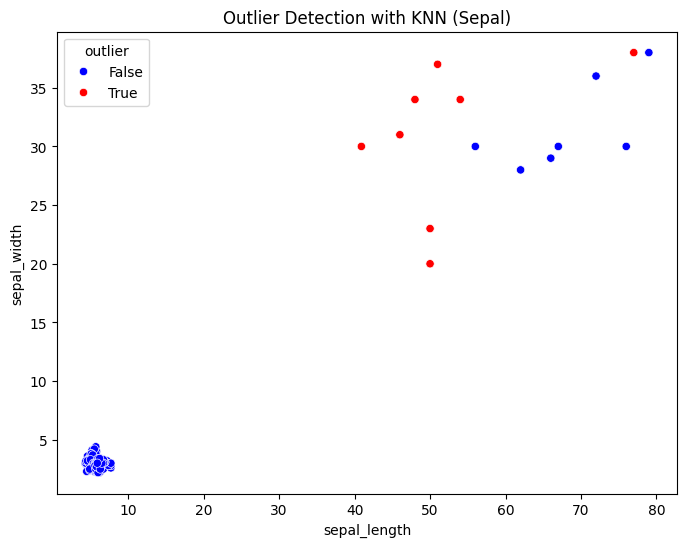

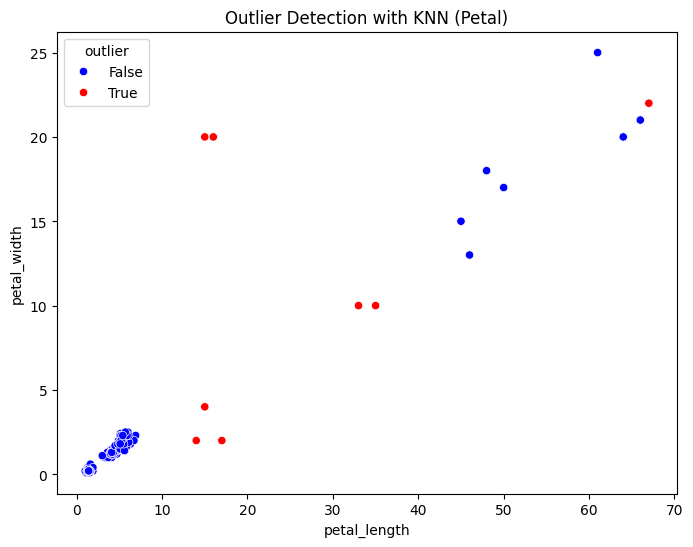

In [4]:
# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Gunakan KNN untuk mendeteksi outlier
K = 5  # Jumlah tetangga terdekat
nbrs = NearestNeighbors(n_neighbors=K+1, metric='euclidean').fit(data_values)
distances, indices = nbrs.kneighbors(data_values)

# Ambil rata-rata jarak ke K tetangga terdekat (tidak termasuk jarak ke dirinya sendiri)
df_merged["knn_distance"] = np.mean(distances[:, 1:], axis=1)

# Tentukan threshold outlier berdasarkan persentil ke-95
threshold = np.percentile(df_merged["knn_distance"], 95)
df_merged["outlier"] = df_merged["knn_distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Petal)")
plt.show()

#### Total outlier

In [5]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 8


In [6]:
# Menyaring data yang terdeteksi sebagai outlier
# Kemudian mengurutkannya berdasarkan nilai "knn_distance" dari yang terbesar
outliers = df_merged[df_merged["outlier"]].sort_values(by="knn_distance", ascending=False)

# Menampilkan daftar outlier teratas dalam format yang lebih rapi
print("Outlier Teratas:")
print(outliers.to_string(index=False))

Outlier Teratas:
 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  2     Iris-setosa          14.0          2.0          40.9         30.0     17.746135     True
 61 Iris-versicolor          35.0         10.0          50.0         20.0     17.373225     True
 94 Iris-versicolor          33.0         10.0          50.0         23.0     16.800181     True
  4     Iris-setosa          15.0         20.0          46.0         31.0     16.556602     True
 12     Iris-setosa          16.0         20.0          48.0         34.0     16.371222     True
 21     Iris-setosa          17.0          2.0          54.0         34.0     15.904666     True
 22     Iris-setosa          15.0          4.0          51.0         37.0     15.115576     True
118  Iris-virginica          67.0         22.0          77.0         38.0     13.853855     True


In [7]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="knn_distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
 10     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
 35     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
 38     Iris-setosa           1.5          0.1           4.9          3.1      0.109282    False
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
 40     Iris-setosa           1.5          0.2           5.1          3.4      0.139494    False
 18     Iris-setosa           1.4          0.3           5.1          3.5      0.152207    False
 28     Iris-setosa           1.5          0.2           5.2          3.5      0.164215    False
 29     Iris-setosa           1.4          0.2           5.2          3.4      0.164215    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
 31     Iris-setosa           

#### Memisahkan outlier dari data 

In [8]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-349c0f6d-posgresqlsilvia.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_EribuBMoRkDuBfKtYVP",
        database="defaultdb",
        port=16412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-397b65f2-posgresqlsilvia.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_TZ0J8yRi7GrNiHAIr19",
        database="defaultdb",
        port=16412
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa          15.0         20.0          46.0         31.0             -1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

Kode ini digunakan untuk mendeteksi dan memisahkan outlier dari dataset yang diambil dari PostgreSQL dan MySQL.

Pertama, kode terhubung ke kedua basis data menggunakan psycopg2 (PostgreSQL) dan pymysql (MySQL), lalu mengambil data dari tabel iris_postgresql dan irismysql. Data tersebut dikonversi menjadi DataFrame dan digabungkan berdasarkan id dan class menggunakan inner join, sehingga hanya data yang ada di kedua tabel yang digunakan.

Selanjutnya, hanya fitur numerik (petal_length, petal_width, sepal_length, dan sepal_width) yang digunakan untuk deteksi outlier. Model Local Outlier Factor (LOF) diterapkan dengan n_neighbors=90, yang membandingkan setiap data dengan 90 tetangga terdekat. LOF memberi label 1 untuk data normal dan -1 untuk outlier.

Hasil deteksi disimpan dalam kolom outlier_label, lalu dataset dibagi menjadi dua:

Data normal (label 1) disimpan dalam df_filtered.
Outlier (label -1) disimpan dalam outliers.

Kode ini menampilkan jumlah total outlier, daftar data yang terdeteksi sebagai outlier, dan data yang tetap setelah pembersihan. Dengan cara ini, kualitas data bisa lebih baik dan hasil analisis atau model pembelajaran mesin menjadi lebih akurat.

#### Menghitung akurasi data 

In [9]:
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Akurasi tanpa outlier: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



Kode ini membandingkan akurasi model K-Nearest Neighbors (KNN) sebelum dan sesudah pembersihan outlier.  

Pertama, fitur numerik diekstrak dari DataFrame, lalu label kelas dikonversi ke format numerik. Model Local Outlier Factor (LOF) digunakan untuk mendeteksi sekitar 10% data sebagai outlier. Dataset kemudian dibagi menjadi dua: satu dengan outlier dan satu tanpa outlier.  

Kedua dataset ini dipisahkan menjadi data pelatihan (80%) dan pengujian (20%). Model KNN dengan 11 tetangga diterapkan menggunakan Pipeline, yang mencakup standarisasi data sebelum pelatihan. Model pertama diuji pada data dengan outlier, sedangkan model kedua diuji pada data tanpa outlier. Akurasi dan classification report dihitung untuk masing-masing model.  

Sebagai hasil, kode ini menampilkan dua nilai akurasi dan laporan klasifikasi untuk melihat dampak outlier. Model tanpa outlier diperkirakan lebih akurat karena outlier bisa mengganggu perhitungan KNN. Dengan perbandingan ini, pengguna dapat menilai apakah pembersihan data meningkatkan performa model.

Akurasi: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.96        27
      macro avg       0.96      0.95      0.95        27
   weighted avg       0.97      0.96      0.96        27



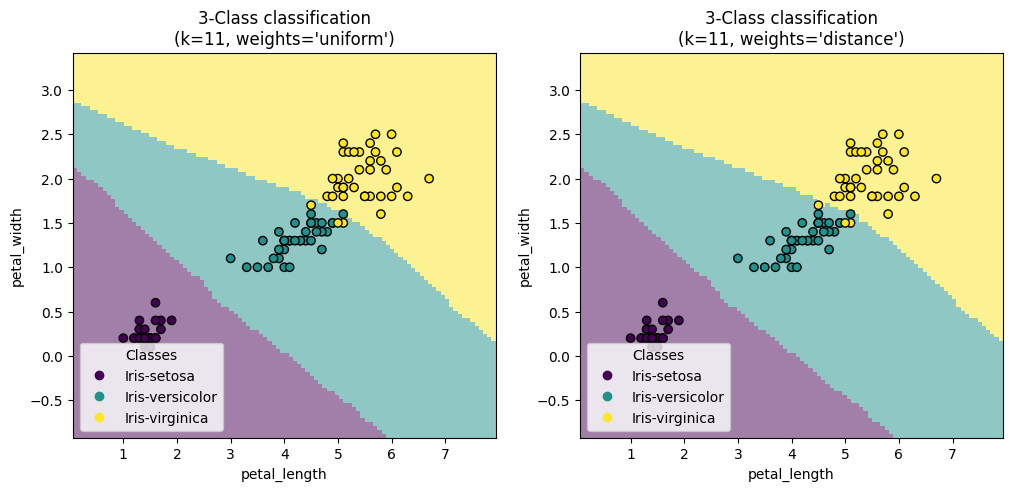

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_cleaned[feature_columns]
y = df_cleaned["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah nama kelas jadi angka

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

1. Bagian Akurasi & Evaluasi Model:

    - Akurasi 96% menunjukkan model KNN mampu mengklasifikasikan 96% data uji dengan benar, yang menandakan performa yang baik.
    - Iris-setosa diklasifikasikan dengan sempurna (precision, recall, F1-score = 1.00).
    - Iris-versicolor memiliki precision 1.00 tetapi recall 0.86, yang berarti beberapa sampel salah diklasifikasikan.
    - Iris-virginica memiliki precision 0.89 tetapi recall 1.00, menandakan semua data kelas ini dikenali, tetapi ada beberapa kesalahan prediksi.
    - Rata-rata makro dan berbobot (macro & weighted F1-score) sekitar 0.95-0.96, menunjukkan keseimbangan performa model antar kelas.

2. Bagian Visualisasi Decision Boundary:

    - Plot kiri (weights='uniform'): Semua tetangga dalam KNN memiliki bobot yang sama, sehingga decision boundary lebih tegas dan seragam.
    - Plot kanan (weights='distance'): Tetangga lebih dekat mendapat bobot lebih besar, sehingga decision boundary lebih fleksibel dan menyesuaikan pola lokal data.
    - Warna latar menunjukkan area klasifikasi masing-masing kelas:
        - Ungu → Iris-setosa
        - Teal (biru kehijauan) → Iris-versicolor
        - Kuning → Iris-virginica
    - Titik data tetap sama, dengan warna yang mencerminkan kelas asli setiap sampel.

3. Kesimpulan:
    - weights='uniform' → Decision boundary lebih kaku dan simetris, karena semua tetangga memberikan pengaruh yang sama.
    - weights='distance' → Decision boundary lebih dinamis, mengikuti distribusi data karena tetangga yang lebih dekat berpengaruh lebih besar.

Akurasi: 0.8148148148148148
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.75      0.43      0.55         7
 Iris-virginica       0.64      0.88      0.74         8

       accuracy                           0.81        27
      macro avg       0.80      0.77      0.76        27
   weighted avg       0.83      0.81      0.80        27



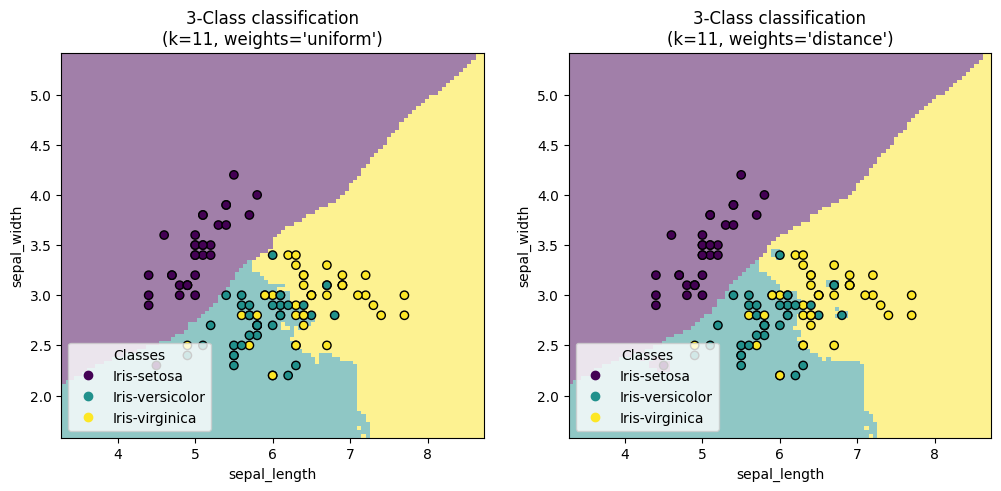

In [11]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay


# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["sepal_length", "sepal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Penjelasan Hasil Angka
Akurasi: Model KNN mencapai 81%, artinya 81% data uji diklasifikasikan dengan benar. Ini menunjukkan performa yang cukup baik, tetapi masih ada ruang untuk perbaikan, terutama pada kelas Iris-versicolor.

1. Iris-setosa
    - Precision: 1.00 → Semua prediksi benar.
    - Recall: 1.00 → Semua data kelas ini diklasifikasikan dengan benar.
    - F1-score: 1.00 → Kombinasi precision dan recall sempurna.
    - Support: 12 → Jumlah sampel dalam data uji.

2. Iris-versicolor
    - Precision: 0.75 → Ada beberapa kesalahan prediksi.
    - Recall: 0.43 → Hanya 43% data kelas ini diklasifikasikan dengan benar.
    - F1-score: 0.55 → Performa kurang memuaskan.
    - Support: 7.

3. Iris-virginica
    - Precision: 0.64 → Cukup baik dalam memprediksi kelas ini.
    - Recall: 0.88 → Mayoritas data diklasifikasikan dengan benar.
    - F1-score: 0.74 → Kombinasi cukup baik antara precision dan recall.
    - Support: 8.

4. Overall Metrics
    - Macro Average (tanpa memperhatikan ukuran kelas):
        - Precision: 0.80, Recall: 0.77, F1-score: 0.76.
    - Weighted Average (mempertimbangkan ukuran kelas):
        - Precision: 0.83, Recall: 0.81, F1-score: 0.80.

Penjelasan Gambar
1. Plot Kiri (weights='uniform')
    - Warna Latar:
        - Ungu → Iris-setosa.
        - Teal → Iris-versicolor.
        - Kuning → Iris-virginica.

    - Titik Data:
        - Lingkaran ungu → Data asli kelas Iris-setosa.
        - Lingkaran teal → Data asli kelas Iris-versicolor.
        - Lingkaran kuning → Data asli kelas Iris-virginica.

    - Decision Boundary:
        - Lebih kaku, karena semua tetangga memiliki bobot yang sama.
        - Area klasifikasi terlihat lebih seragam.

2. Plot Kanan (weights='distance')
    - Warna Latar & Titik Data: Sama seperti plot kiri.
    - Decision Boundary:
        - Lebih fleksibel, karena tetangga yang lebih dekat memiliki pengaruh lebih besar.
        - Area klasifikasi lebih adaptif terhadap distribusi data.

3. Perbandingan:
    - Uniform: Area klasifikasi lebih kaku dan kurang menyesuaikan dengan pola data.
    - Distance: Area klasifikasi lebih adaptif, mengikuti distribusi data secara lebih alami.

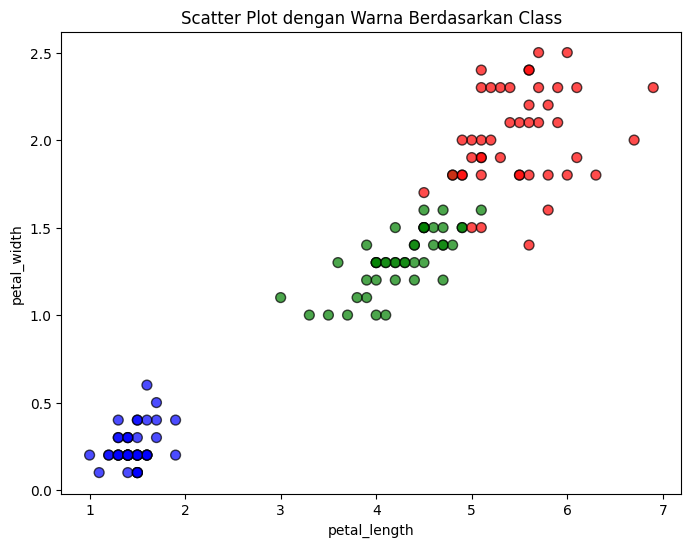

In [12]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal_length"
y_feature = "petal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

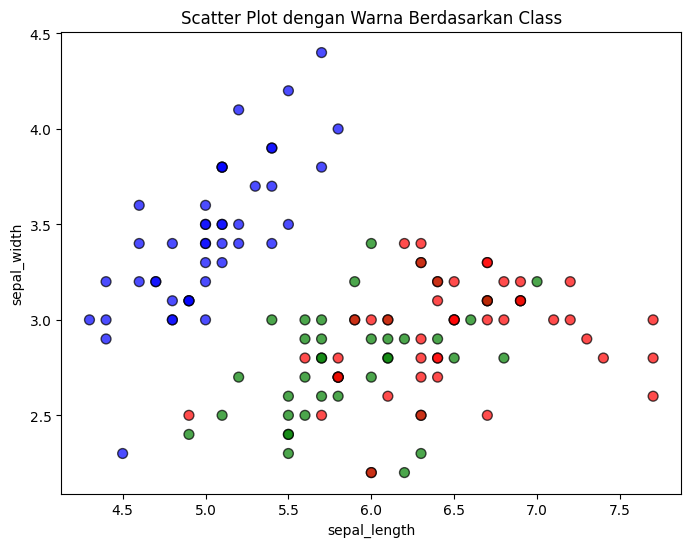

In [13]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "sepal_length"
y_feature = "sepal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

## Implementasi naive bayes pada data iris

Number of mislabeled points with outliers out of a total 30 points : 20
Accuracy with outliers: 33.33%
Mislabeled points with outliers:
Index: 1, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 2, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 5, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 7, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 10, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 11, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 12, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 13, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 14, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 16, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 19, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 20, True Label: Iris-setosa, Predicted: Iris-versicolor
Index: 21, True Label: Iris-virginica, Predicted: Iris-versicolor
Index: 22, True Label: Iris-set

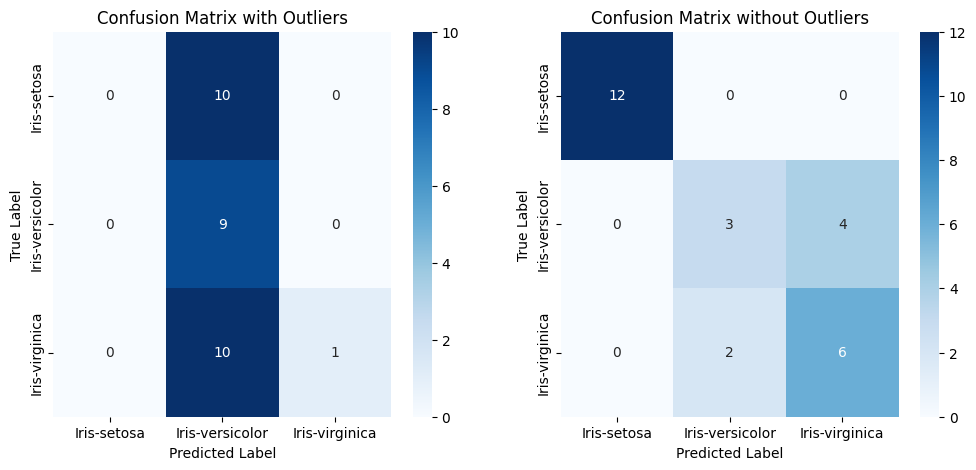

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df_merged sudah ada dari kode sebelumnya

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
df_merged["class_encoded"] = label_encoder.fit_transform(df_merged["class"])

# Data dengan outlier
X_all = df_merged[feature_columns]
y_all = df_merged["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Data tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])
X_clean = df_cleaned[feature_columns]
y_clean = df_cleaned["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Split data dengan outlier
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42)

# Split data tanpa outlier
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
gnb = GaussianNB()

# Latih dan uji model dengan outlier
y_pred_all = gnb.fit(X_train_all, y_train_all).predict(X_test_all)
mislabeled_all = (y_test_all != y_pred_all).sum()
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Number of mislabeled points with outliers out of a total %d points : %d" % (X_test_all.shape[0], mislabeled_all))
print("Accuracy with outliers: %.2f%%" % (accuracy_all * 100))

# Menampilkan label yang salah pada data dengan outlier
mislabeled_indices_all = np.where(y_test_all != y_pred_all)[0]
print("Mislabeled points with outliers:")
for i in mislabeled_indices_all:
    true_label = label_encoder.inverse_transform([int(y_test_all[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_all[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")
print()
# Latih dan uji model tanpa outlier
y_pred_clean = gnb.fit(X_train_clean, y_train_clean).predict(X_test_clean)
mislabeled_clean = (y_test_clean != y_pred_clean).sum()
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Number of mislabeled points without outliers out of a total %d points : %d" % (X_test_clean.shape[0], mislabeled_clean))
print("Accuracy without outliers: %.2f%%" % (accuracy_clean * 100))

# Menampilkan label yang salah pada data tanpa outlier
mislabeled_indices_clean = np.where(y_test_clean != y_pred_clean)[0]
print("Mislabeled points without outliers:")
for i in mislabeled_indices_clean:
    true_label = label_encoder.inverse_transform([int(y_test_clean[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_clean[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")

# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test_all, y_pred_all), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix with Outliers")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(y_test_clean, y_pred_clean), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix without Outliers")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()